In [502]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [503]:
df = pd.read_csv("Country-data.csv")

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [56]:
df_nums = df.select_dtypes("number").copy()

In [57]:
df_nums

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [195]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [197]:
scaled_nums = scaler.fit_transform(df_nums)

In [198]:
scaled_nums

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [62]:
scaled_nums

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [63]:
df[df.select_dtypes("number").columns] = scaler.fit_transform(df.select_dtypes("number"))

In [64]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [65]:
from sklearn.cluster import KMeans 

In [66]:
kmeans = KMeans()


# PCA of Data

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca = PCA()

In [69]:
pca.fit(scaled_nums)

PCA()

In [70]:
pca.explained_variance_ratio_


array([0.55001227, 0.13384784, 0.12301053, 0.09749047, 0.03777964,
       0.03013659, 0.01190434, 0.00887791, 0.00694042])

In [71]:
pca.explained_variance_ratio_.cumsum()


array([0.55001227, 0.6838601 , 0.80687063, 0.9043611 , 0.94214073,
       0.97227732, 0.98418166, 0.99305958, 1.        ])

In [72]:
pca = PCA(n_components=4)
pca_1_and_2 = pca.fit_transform(scaled_nums)

In [73]:
pca_1_and_2

array([[-0.59907764,  0.09549001,  0.15755381, -0.0243325 ],
       [ 0.1584743 , -0.2120924 , -0.064189  , -0.06124679],
       [ 0.00368552, -0.13586725, -0.13418203,  0.13357441],
       [-0.65023499,  0.27597526, -0.14267249,  0.15601831],
       [ 0.20071124, -0.06466223, -0.10071549, -0.03790176],
       [ 0.112534  , -0.20604633,  0.11894181,  0.10644779],
       [ 0.08748612, -0.24430696, -0.15356623,  0.01233055],
       [ 0.44078359,  0.01628159,  0.26919877,  0.22565697],
       [ 0.52052639,  0.11505267,  0.24351973,  0.00194794],
       [ 0.03880915, -0.12198813, -0.0786279 ,  0.06384634],
       [ 0.25330504, -0.03709248,  0.08019008,  0.00468621],
       [ 0.28004875,  0.08194452, -0.15126384,  0.10232208],
       [-0.10721304, -0.24817007, -0.12289118,  0.11901114],
       [ 0.23240595, -0.10625665,  0.02500208, -0.07014099],
       [ 0.18238383, -0.10352266, -0.1904069 , -0.08657552],
       [ 0.49552529,  0.24168217,  0.13560605, -0.10766878],
       [ 0.0343959 , -0.

In [74]:
pc1 = pca_1_and_2[:,0]
pc2 = pca_1_and_2[:,1]

In [75]:

df["pc1"] = pc1 = pca_1_and_2[:,0]
df["pc2"] = pc2 = pca_1_and_2[:,1]

In [76]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pc1,pc2
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,-0.599078,0.095490
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0.158474,-0.212092
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0.003686,-0.135867
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,-0.650235,0.275975
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0.200711,-0.064662


## K elbow visualiser to get cluster number recommendation

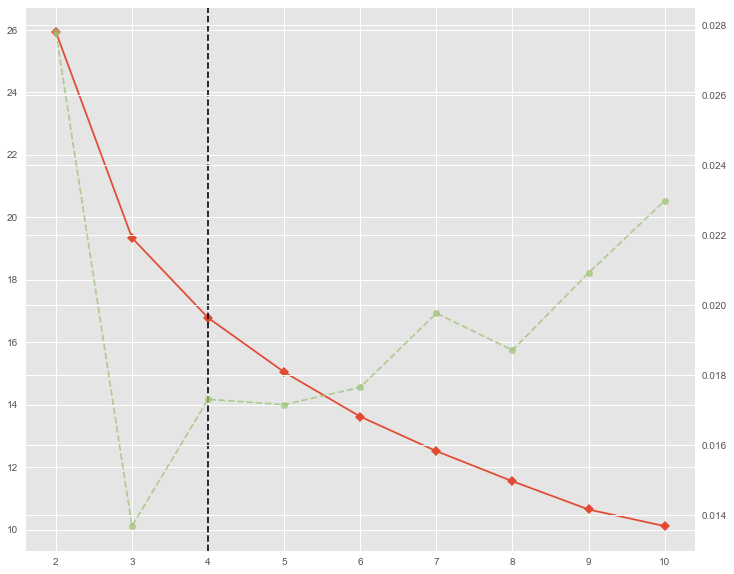

In [479]:
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12,10))
viz = KElbowVisualizer(KMeans())
viz.fit(scaled_nums)
plt.show()


## We choose a two cluster K Means

In [118]:
model = KMeans(2)
model.fit(pca_1_and_2)

KMeans(n_clusters=2)

In [119]:
model.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

In [120]:
df["two_clusters"] = model.labels_

In [149]:
df1 = pd.read_csv("Country-data.csv")

In [154]:
df1["two_clusters"] = model.labels_
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,two_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


## Attaching PCA scores to df

In [159]:
df1["pc1"] = pc1 = pca_1_and_2[:,0]
df1["pc2"] = pc2 = pca_1_and_2[:,1]

In [160]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pc1,pc2,two_clusters
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,-0.599078,0.095490,0
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0.158474,-0.212092,1
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0.003686,-0.135867,1
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,-0.650235,0.275975,0
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0.200711,-0.064662,1


In [143]:
dev_zero.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pc1,pc2,two_clusters
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,-0.599078,0.095490,0
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,-0.650235,0.275975,0
17,Benin,0.527751,0.118520,0.142324,0.213495,0.009735,0.047084,0.585799,0.664038,0.005030,-0.572115,0.088916,0


In [161]:
dev_zero = df1.loc[df1.two_clusters == 0] 
dev_zero.health.nlargest(5)

132    13.1
88     11.8
26     11.6
81     11.3
87     11.1
Name: health, dtype: float64

In [162]:
dev_one = df1.loc[df.two_clusters == 1] 
dev_one.health.nlargest(5)

159    17.9
101    14.2
54     11.9
110    11.9
102    11.7
Name: health, dtype: float64

In [163]:
df1.groupby('two_clusters').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pc1,pc2
two_clusters,,,,,,,,,,,
0,87.188679,28.921113,6.274151,42.678602,3880.433962,11.407453,60.011321,4.829811,1908.264151,-0.458693,0.072387
1,15.527193,46.775263,7.067456,48.848246,23311.403509,6.096237,75.457895,2.073070,18104.175439,0.213252,-0.033653


In [166]:
dev_one.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'two_clusters', 'pc1',
       'pc2'],
      dtype='object')

In [191]:
dev_one.groupby("country").life_expec.mean().nlargest(5)

country
Japan          82.8
Singapore      82.7
Switzerland    82.2
Australia      82.0
Iceland        82.0
Name: life_expec, dtype: float64

In [192]:
dev_one.groupby("country").life_expec.mean().nsmallest(5)

country
Fiji                     65.3
Micronesia, Fed. Sts.    65.4
Guyana                   65.5
Cambodia                 66.1
Mongolia                 66.2
Name: life_expec, dtype: float64

In [193]:
dev_zero.groupby("country").life_expec.mean().nlargest(5)

country
Samoa          71.5
Timor-Leste    71.1
Tajikistan     69.6
Mauritania     68.2
Yemen          67.5
Name: life_expec, dtype: float64

In [194]:
dev_zero.groupby("country").life_expec.mean().nsmallest(5)

country
Haiti                       32.1
Lesotho                     46.5
Central African Republic    47.5
Zambia                      52.0
Malawi                      53.1
Name: life_expec, dtype: float64

In [548]:
#centroids = pd.DataFrame(model.cluster_centers_, columns=["pc1", "pc2"], index=["centroid_1", "centroid_2", 
                                                                                #"centroids_3"])

In [188]:
#centroids

In [190]:
#plt.figure(figsize=(14,10))
#sns.scatterplot(data=df, x="pc1", y="pc2", style="3_Clusters", alpha=0.3, s=300)
#sns.scatterplot(data=centroids, x ="pc1", y="pc2", s=300, c=["black"])

#plt.show()

## Kmeans with Two Clusters

In [201]:
model = KMeans(2)
model.fit(scaled_nums)

KMeans(n_clusters=2)

In [202]:
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [203]:
df2 = pd.read_csv("Country-data.csv")

In [204]:
df2["two_clusters"] = model.labels_


In [205]:
df2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,two_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


## Filtering data based on cluster class

In [206]:
dev_zero = df2.loc[df2.two_clusters == 0] 
dev_one = df2.loc[df2.two_clusters == 1] 



In [207]:
dev_zero

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,two_clusters
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
159,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400,0
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0


In [209]:
dev_one.count()

country         53
child_mort      53
exports         53
health          53
imports         53
income          53
inflation       53
life_expec      53
total_fer       53
gdpp            53
two_clusters    53
dtype: int64

In [210]:
dev_zero.count()

country         114
child_mort      114
exports         114
health          114
imports         114
income          114
inflation       114
life_expec      114
total_fer       114
gdpp            114
two_clusters    114
dtype: int64

## Pairplot to analyse

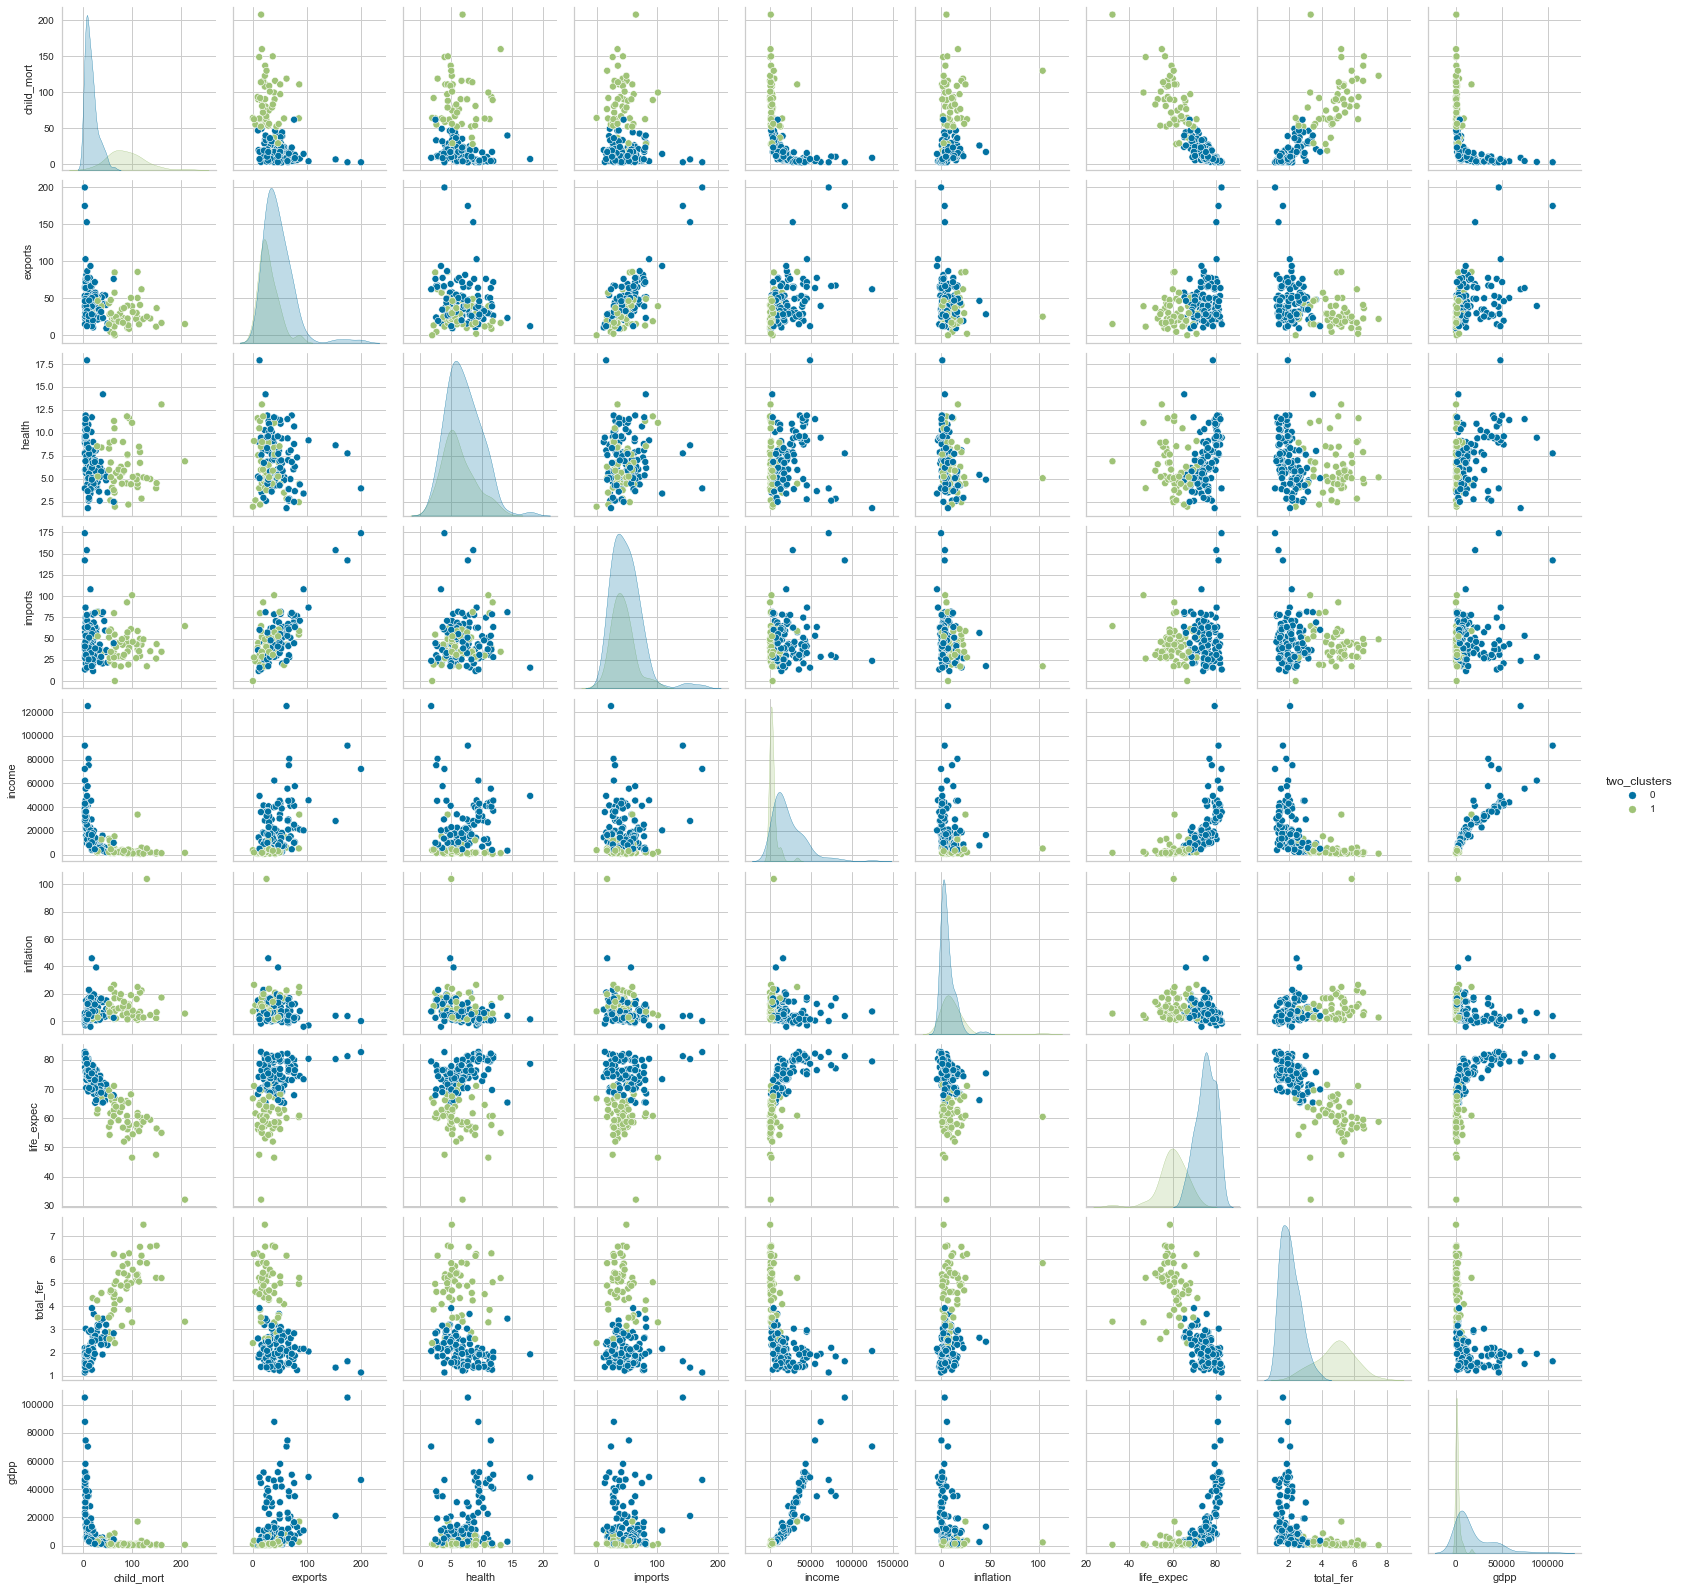

In [213]:
sns.pairplot(df2, hue="two_clusters")

## Using Three clusters instead of two

In [387]:
model = KMeans(3)
model.fit(scaled_nums)
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [388]:
df3 = pd.read_csv("Country-data.csv")
df3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [389]:
df3["three_clusters"] = model.labels_

In [390]:
df3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,three_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Pairplot to analyse findings

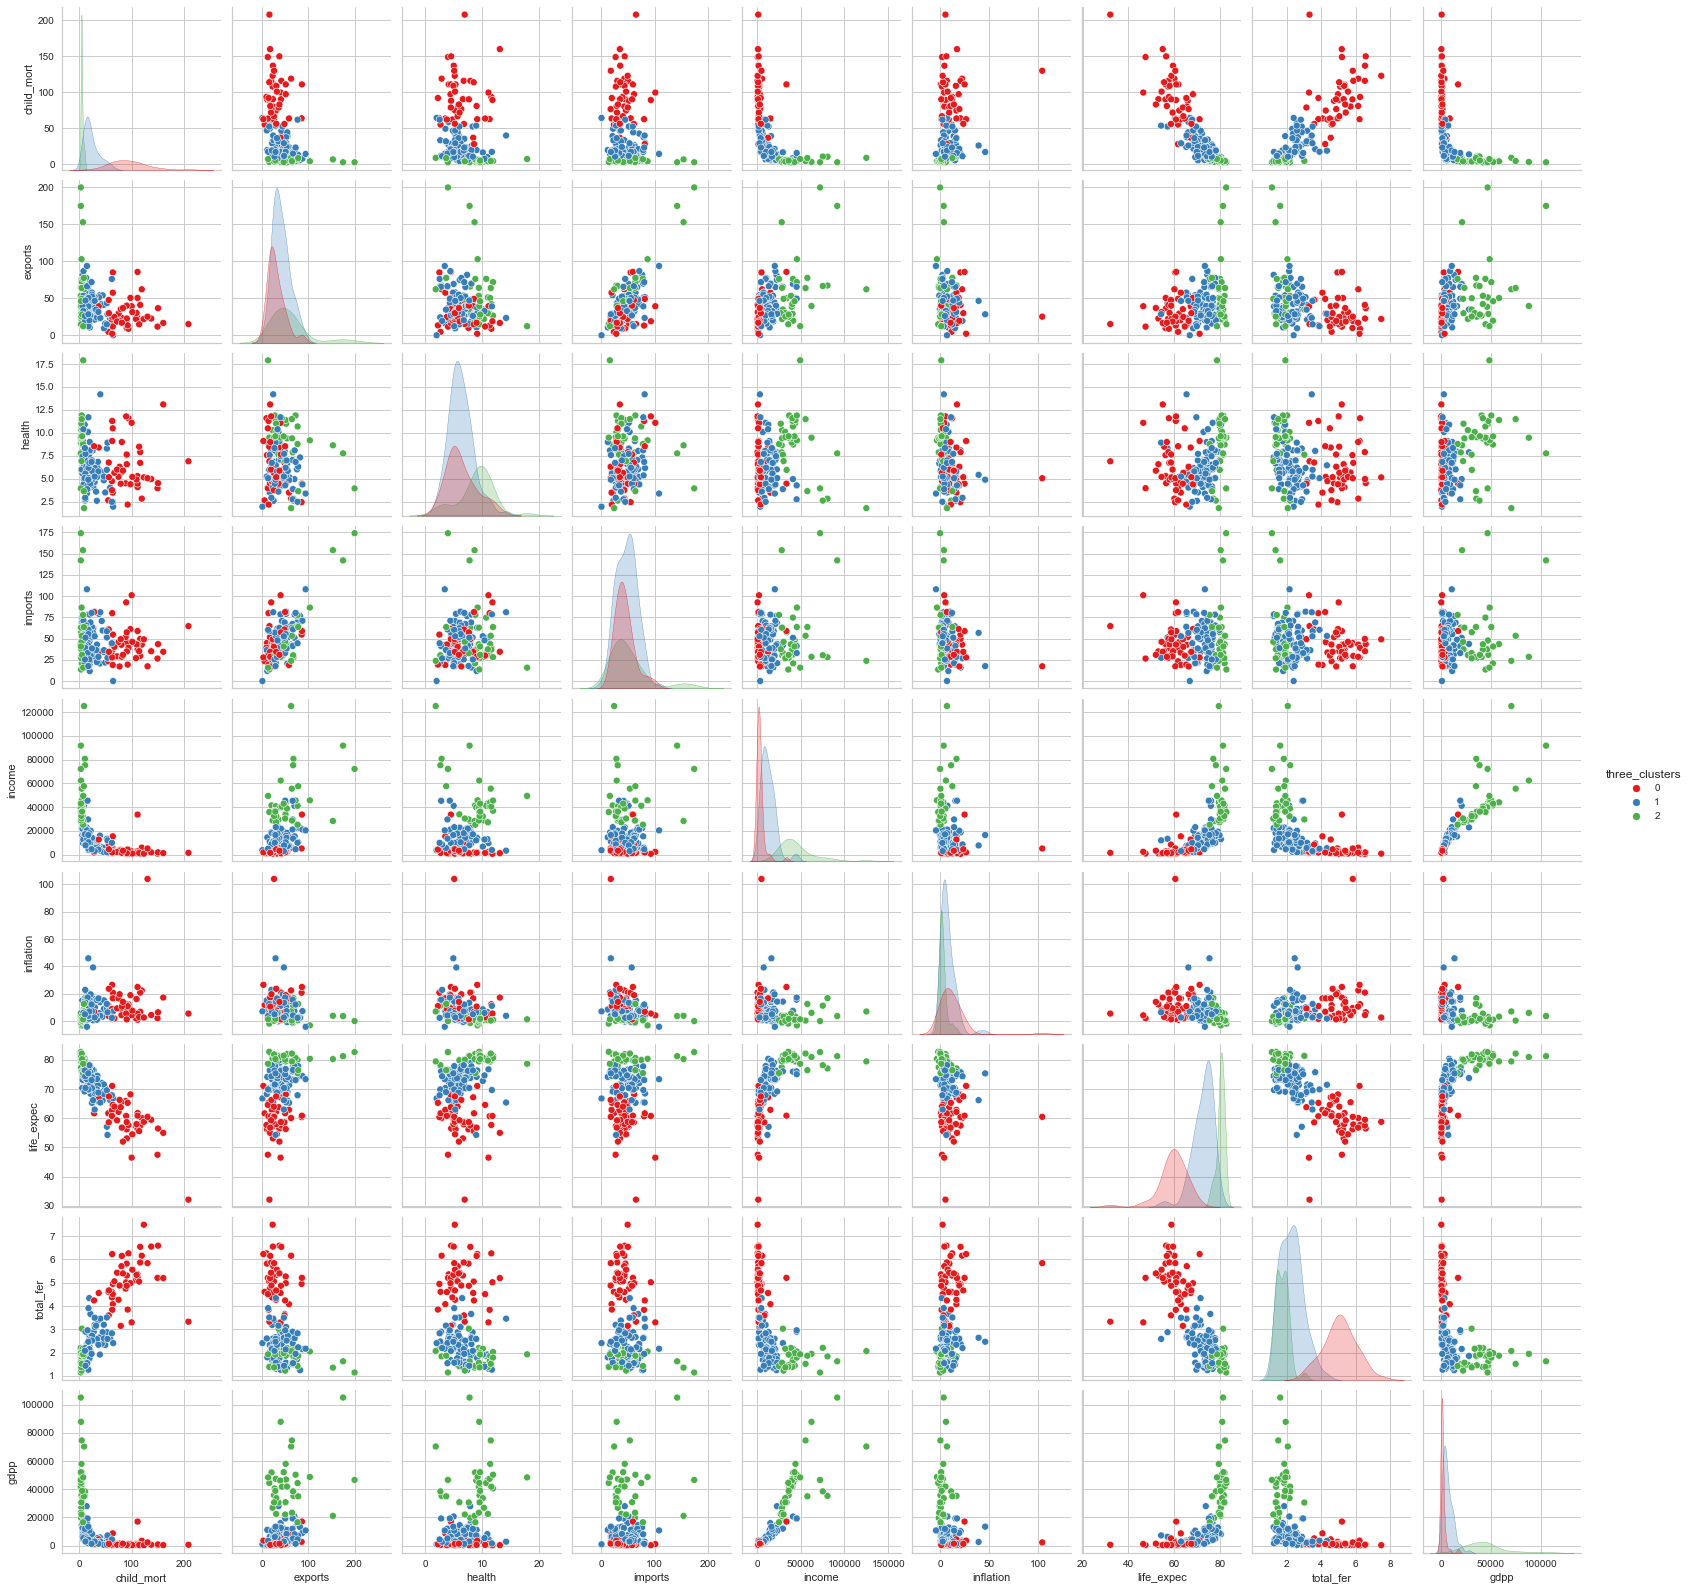

In [316]:
sns.pairplot(df3, hue="three_clusters", palette="Set1")

In [391]:
df3.loc[df3.three_clusters == 1, 'country']

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108     

In [392]:
df3.loc[df3.three_clusters == 2, 'country']

7                 Australia
8                   Austria
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype

In [393]:
df3.loc[df3.three_clusters == 0, 'country'].head(50)

1                    Albania
2                    Algeria
4        Antigua and Barbuda
5                  Argentina
6                    Armenia
9                 Azerbaijan
10                   Bahamas
11                   Bahrain
12                Bangladesh
13                  Barbados
14                   Belarus
16                    Belize
18                    Bhutan
19                   Bolivia
20    Bosnia and Herzegovina
21                  Botswana
22                    Brazil
24                  Bulgaria
27                  Cambodia
30                Cape Verde
33                     Chile
34                     China
35                  Colombia
39                Costa Rica
41                   Croatia
45        Dominican Republic
46                   Ecuador
47                     Egypt
48               El Salvador
51                   Estonia
52                      Fiji
57                   Georgia
61                   Grenada
62                 Guatemala
65            

# Grouping Clusters in Segments connating region and level of development

In [394]:
df3
a_dict = {1:"Developing African Countries",2:"Developed Countries EU and Other",0:"Developing Latin America and Asia"}

df3["three_clusters"] =  df3["three_clusters"].map(a_dict)


In [395]:
df3.head(1)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,three_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Developing African Countries


# Child Mortality vs GDP

<AxesSubplot:title={'center':'Child Mortality vs Income'}, xlabel='income', ylabel='child_mort'>

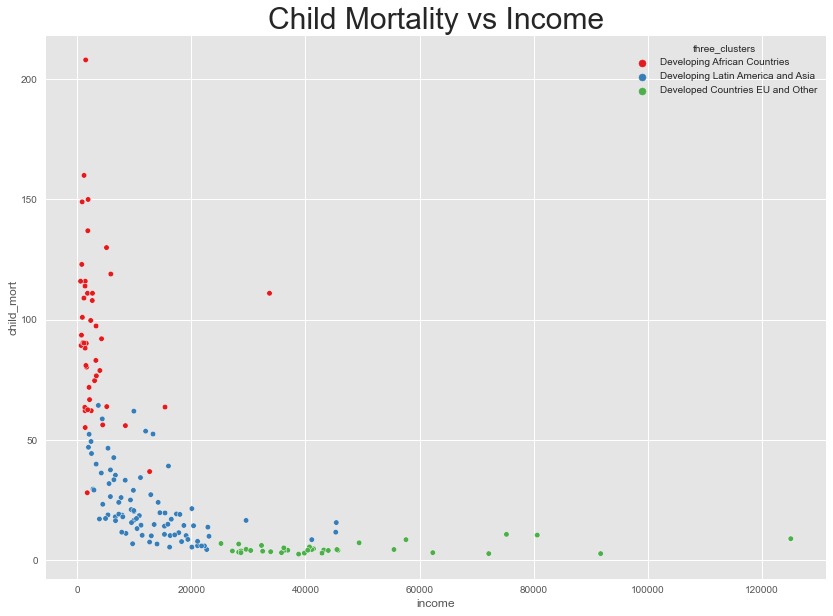

In [475]:
plt.figure(figsize=(14,10))
plt.title("Child Mortality vs Income", fontsize = 30)
sns.scatterplot(data=df3, x="income", y="child_mort", hue="three_clusters",palette="Set1", s=30)

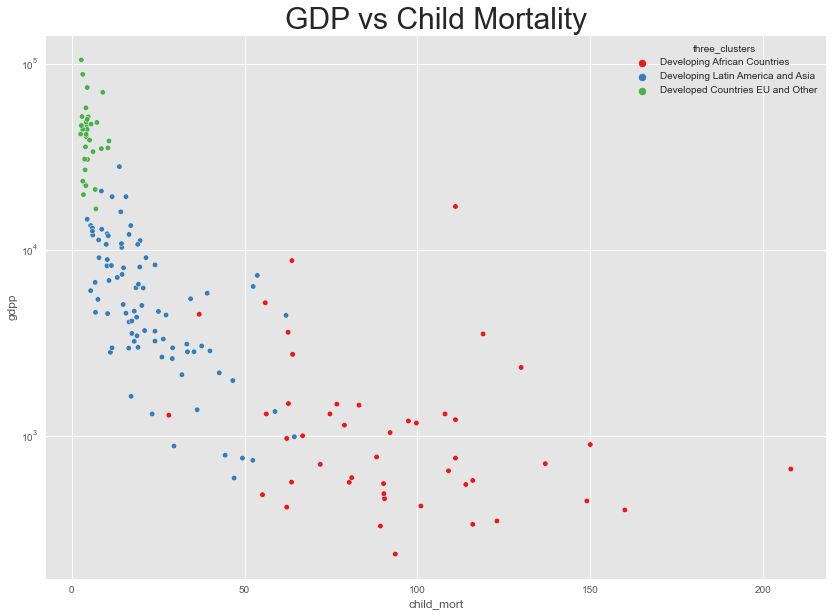

In [542]:
plt.figure(figsize=(14,10))
plt.title("GDP vs Child Mortality", fontsize = 30)
sns.scatterplot(data=df3, x="child_mort", y="gdpp", hue="three_clusters",palette="Set1", s=30)
plt.yscale("log")

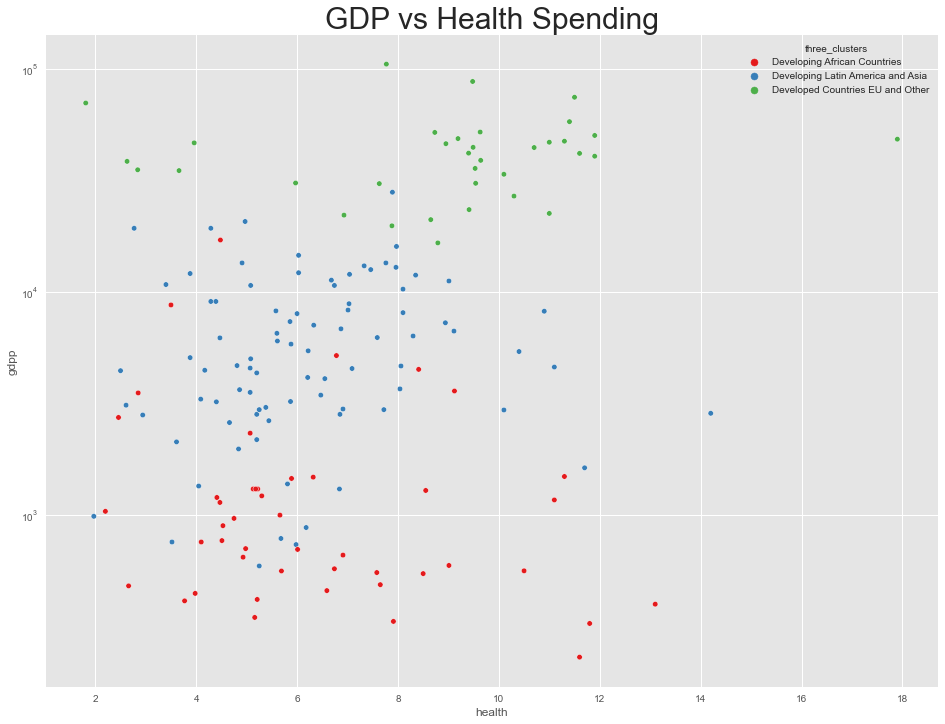

In [543]:
plt.figure(figsize=(16,12))
plt.title("GDP vs Health Spending", fontsize = 30)
sns.scatterplot(data=df3, x="health", y="gdpp", hue="three_clusters", palette="Set1", s=30)
plt.yscale("log")

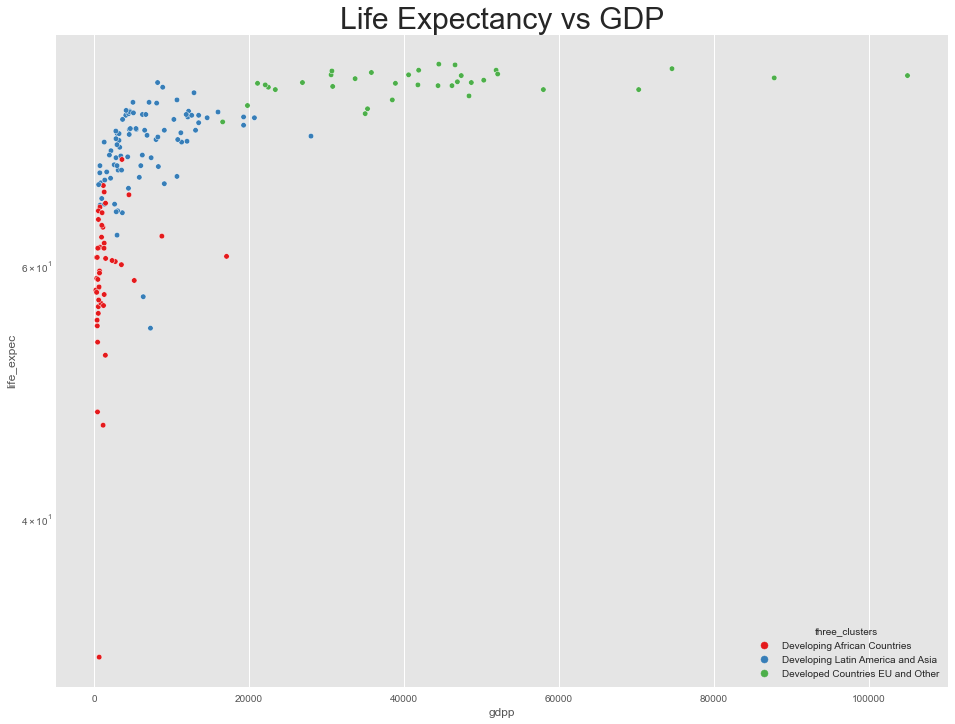

In [544]:
plt.figure(figsize=(16,12))
plt.title("Life Expectancy vs GDP", fontsize = 30)
sns.scatterplot(data=df3, y="life_expec", x="gdpp", hue="three_clusters", palette="Set1", s=30)
plt.yscale("log")

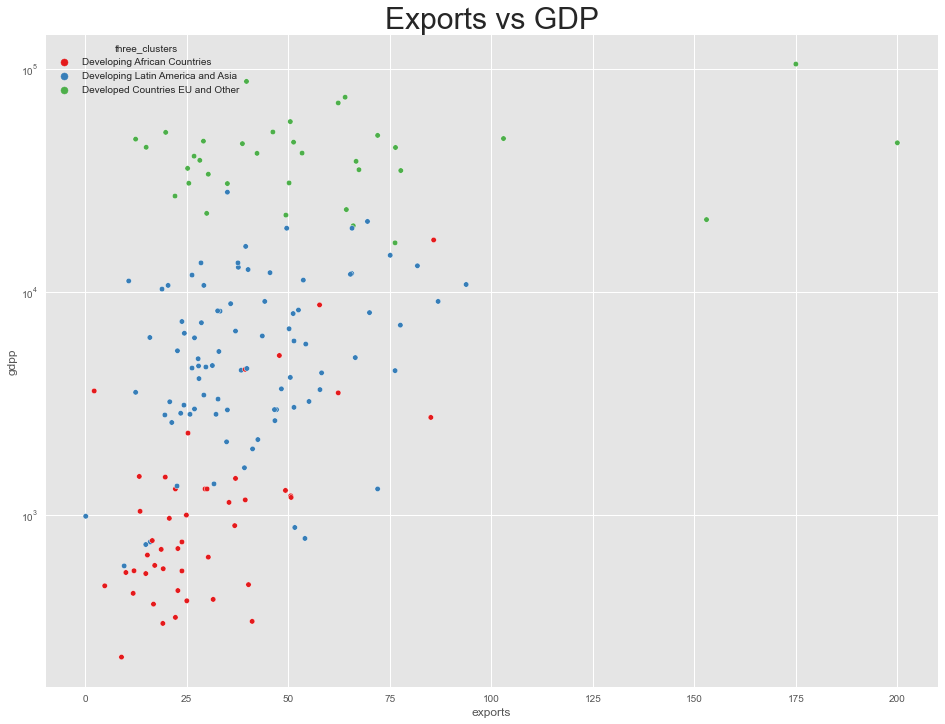

In [511]:
plt.figure(figsize=(16,12))
plt.title("Exports vs GDP", fontsize = 30)
sns.scatterplot(data=df3, x="exports", y="gdpp", hue="three_clusters", palette="Set1", s=30)
plt.yscale("log")

In [266]:
df3.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'three_clusters'],
      dtype='object')

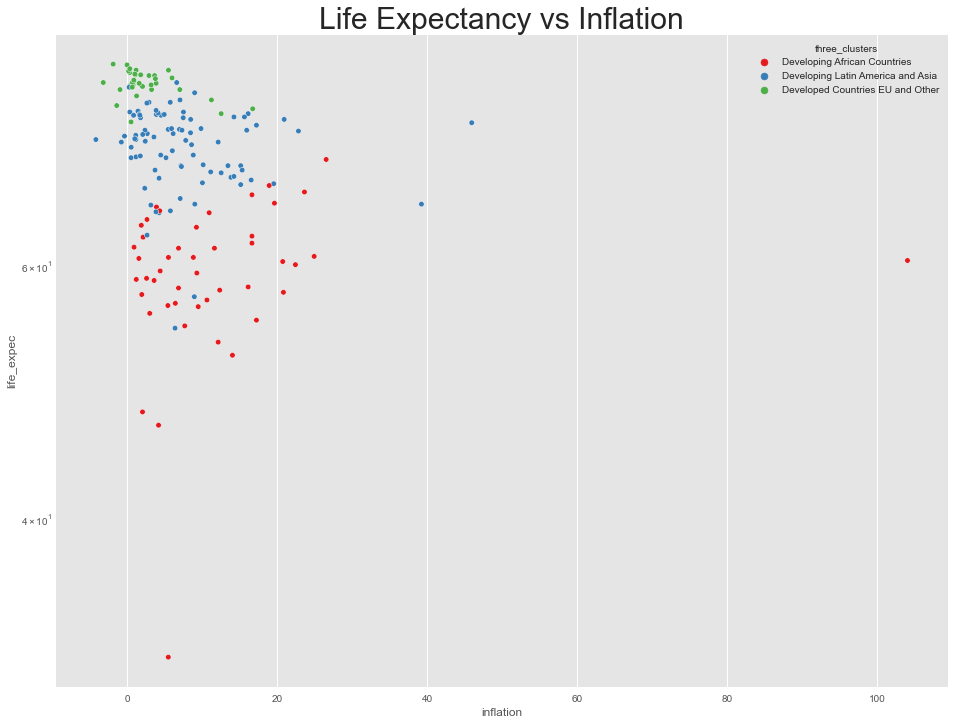

In [545]:
plt.figure(figsize=(16,12))
plt.title("Life Expectancy vs Inflation", fontsize = 30)
sns.scatterplot(data=df3, x="inflation", y="life_expec", hue="three_clusters", palette="Set1", s=30)
plt.yscale("log")

## Impact of GDP on Birth rates?

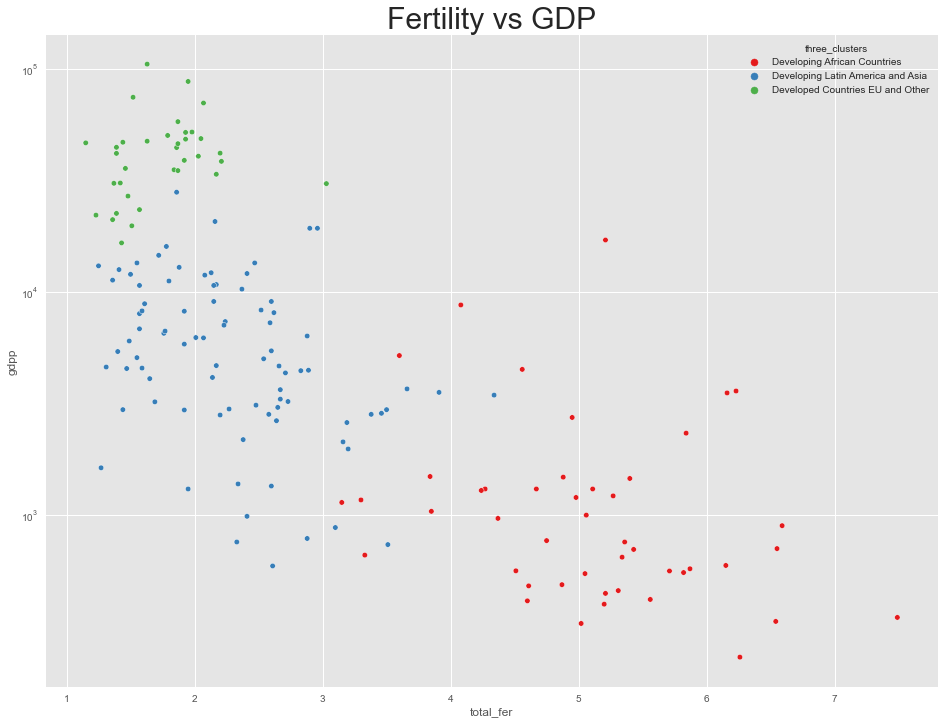

In [546]:
plt.figure(figsize=(16,12))
plt.title("GDP vs Fertility", fontsize = 30)
sns.scatterplot(data=df3, x="total_fer", y="gdpp", hue="three_clusters", palette="Set1", s=30)
plt.yscale("log")

## Impact of GDP on spending on Health per capita

In [356]:
df3.groupby("three_clusters").health.mean().nsmallest(1)

three_clusters
Developing African Countries    6.215581
Name: health, dtype: float64

In [408]:
green = df3.loc[df3.three_clusters == 'Developed Countries EU and Other']
green

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,three_clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed Countries EU and Other
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed Countries EU and Other
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,Developed Countries EU and Other
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,Developed Countries EU and Other
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,Developed Countries EU and Other
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,Developed Countries EU and Other
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,Developed Countries EU and Other
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,Developed Countries EU and Other
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,Developed Countries EU and Other
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,Developed Countries EU and Other


In [409]:
green.groupby(["country"]).health.mean().sort_values()

country
Qatar                    1.81
Kuwait                   2.63
Brunei                   2.84
United Arab Emirates     3.66
Singapore                3.96
Cyprus                   5.97
South Korea              6.93
Israel                   7.63
Luxembourg               7.77
Czech Republic           7.88
Malta                    8.65
Australia                8.73
Slovak Republic          8.79
Finland                  8.95
Ireland                  9.19
Iceland                  9.40
Slovenia                 9.41
Norway                   9.48
Japan                    9.49
Italy                    9.53
Spain                    9.54
Sweden                   9.63
United Kingdom           9.64
New Zealand             10.10
Greece                  10.30
Belgium                 10.70
Austria                 11.00
Portugal                11.00
Canada                  11.30
Denmark                 11.40
Switzerland             11.50
Germany                 11.60
Netherlands             11.90
Fr

In [379]:
df3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,three_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Developing Latin America and Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing African Countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing African Countries
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developing Latin America and Asia
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing African Countries
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developing African Countries
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developing African Countries
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developing African Countries
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Developing Latin America and Asia


In [411]:
red = df3.loc[df3.three_clusters == 'Developing African Countries']

In [412]:
red

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,three_clusters
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,Developing African Countries
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,Developing African Countries
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,Developing African Countries
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,Developing African Countries
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,Developing African Countries
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,Developing African Countries
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,Developing African Countries
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,Developing African Countries
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,Developing African Countries
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,Developing African Countries


In [413]:
blue = df3.loc[df3.three_clusters == 'Developing Latin America and Asia']

## Relatively poorer countries spending more per capita than richer countries

In [417]:
blue.groupby(["country"]).health.mean().sort_values(ascending=False).nlargest(3)

country
Micronesia, Fed. Sts.     14.2
Moldova                   11.7
Bosnia and Herzegovina    11.1
Name: health, dtype: float64

In [416]:
red.groupby(["country"]).health.mean().sort_values(ascending=False).nlargest(3)

country
Sierra Leone    13.1
Liberia         11.8
Burundi         11.6
Name: health, dtype: float64

In [547]:
green.groupby(["country"]).health.mean().sort_values(ascending=False).nsmallest(3)

country
Qatar     1.81
Kuwait    2.63
Brunei    2.84
Name: health, dtype: float64

<AxesSubplot:xlabel='country'>

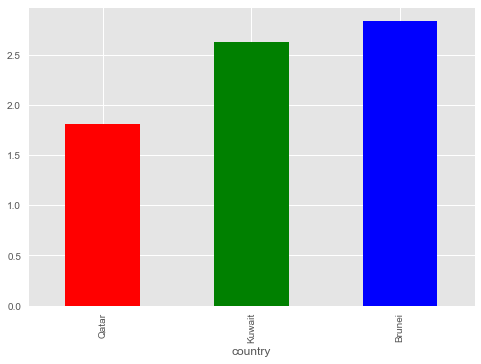

In [470]:
green.groupby(["country"]).health.mean().sort_values(ascending=False).nsmallest(3).plot.bar(color = ['red', 'green', 'blue'])

## Normal Distribution for key areas

In [529]:
df3.three_clusters.value_counts()

Developing Latin America and Asia    86
Developing African Countries         46
Developed Countries EU and Other     35
Name: three_clusters, dtype: int64

In [532]:
df3.groupby('three_clusters').child_mort.mean()

three_clusters
Developed Countries EU and Other      4.897143
Developing African Countries         93.284783
Developing Latin America and Asia    22.425581
Name: child_mort, dtype: float64

In [533]:
df3.groupby('three_clusters').child_mort.var()

three_clusters
Developed Countries EU and Other        4.540286
Developing African Countries         1161.406208
Developing Latin America and Asia     209.089691
Name: child_mort, dtype: float64

## Child Mortality

<AxesSubplot:xlabel='child_mort', ylabel='Density'>

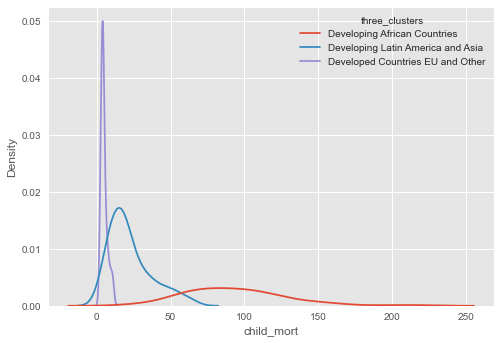

In [541]:
sns.kdeplot(data=df3, x="child_mort", hue="three_clusters", color='g')
#plt.xscale("log")


## Life Expectancy

<AxesSubplot:xlabel='life_expec', ylabel='Density'>

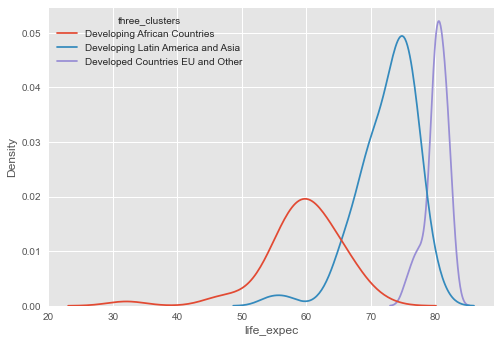

In [497]:
sns.kdeplot(data=df3, x="life_expec", hue="three_clusters", color="r",  linestyle="-")


## GDP

<AxesSubplot:xlabel='gdpp', ylabel='Density'>

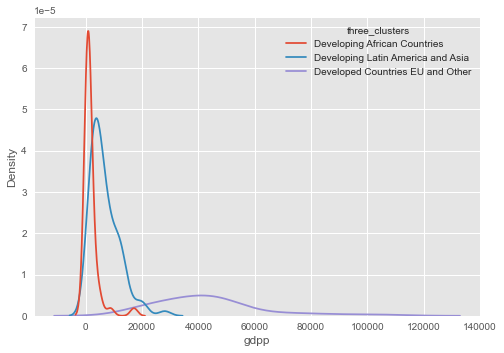

In [498]:
sns.kdeplot(data=df3, x="gdpp", hue="three_clusters", color="r",  linestyle="-")


## Ferlity rate

<AxesSubplot:xlabel='total_fer', ylabel='Density'>

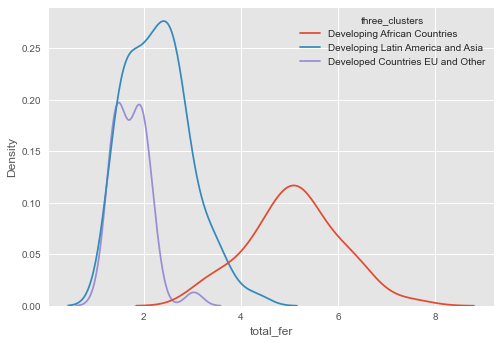

In [507]:
sns.kdeplot(data=df3, x="total_fer", hue="three_clusters", color="r",  linestyle="-")
